# BUMP
Analyse results of barotropic flow over a bump mitgcm simulation

Using [xarray](http://xarray.pydata.org/en/stable/) for quick and easy data access.

In [1]:
# %load /Users/gunnar/Projects/python/standard_imports.py
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
import gsw
import cmocean

# import own modules (install from https://github.com/gunnarvoet/pythonlib))
import gvpy.gvimport as gvi
import gvpy.figure as gvf
import gvpy.misc as gv
import gvpy.ocean as gvo
import spfunctions.spfunctions as spf

# Automatically reload modules. Use this for modules that will be modified while
# editing this notebook.
# Option 1 means only reload modules given in aimport.
# Option 2 means reload all except for those in aimport
# Running %aimport by itself will show what it is doing.
%reload_ext autoreload
%autoreload 1
%aimport spfunctions
%aimport gvpy
%aimport gvpy.misc
%aimport gvpy.ocean
%aimport gvpy.figure
%aimport gvpy.gvimport

import warnings
warnings.filterwarnings('ignore')

## Read model data
Start looking at the non-hydrostatic run B6. Will compare results with hydrostatic B5 later.

In [2]:
DataDir = '/Volumes/svalbard/mitgcm/bump/B6/run/allmnc/'
# DataDir = '/Users/gunnar/Projects/model/bump_data/B6/allmnc/'

# read grid parameters, diagnostics output and state variables
b6 = xr.open_dataset(DataDir+'diag1.glob.nc')
b6s = xr.open_dataset(DataDir+'state.glob.nc')
grid = xr.open_dataset(DataDir+'grid.glob.nc')
# load additional diagnostics
b62 = xr.open_dataset(DataDir+'diag2.glob.nc')
# |PHIBOT  |  1 |       |SM      M1|m^2/s^2         |Bottom Pressure Pot.(p/rho) Anomaly
# |ETAN    |  1 |       |SM      M1|m               |Surface Height Anomaly

In [3]:
b6.coords

Coordinates:
  * Xp1      (Xp1) float64 0.0 5e+03
  * Y        (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * X        (X) float64 2.5e+03
  * Yp1      (Yp1) float64 0.0 1e+03 1.998e+03 2.994e+03 3.989e+03 4.981e+03 ...
  * T        (T) float64 450.0 1.35e+03 2.25e+03 3.15e+03 4.05e+03 4.95e+03 ...

In [4]:
b6.data_vars

Data variables:
    diag_levels  (Zmd000100) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ...
    iter         (T) int32 90 270 450 630 810 990 1170 1350 1530 1710 1890 ...
    UVEL         (T, Zmd000100, Y, Xp1) float64 0.0 0.0 2.598e-08 2.598e-08 ...
    VVEL         (T, Zmd000100, Yp1, X) float64 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
    THETA        (T, Zmd000100, Y, X) float64 3.0 3.0 3.0 3.0 3.0 3.0 3.0 ...
    PHIHYD       (T, Zmd000100, Y, X) float64 0.0 0.0003291 0.0003219 ...
    KLeps        (T, Zld000100, Y, X) float64 0.0 5.866e-26 8.12e-26 ...
    KLdiffKr     (T, Zld000100, Y, X) float64 1e-05 1e-05 1e-05 1e-05 1e-05 ...
    KLviscAr     (T, Zld000100, Y, X) float64 1e-05 1e-05 1e-05 1e-05 1e-05 ...
    WVEL         (T, Zld000100, Y, X) float64 0.0 7.881e-07 7.891e-07 ...
    WV_VEL       (T, Zld000100, Yp1, X) float64 0.0 7.874e-08 1.577e-07 ...
    momKE        (T, Zmd000100, Y, X) float64 0.02 0.02 0.02 0.02 0.02 0.02 ...

In [5]:
b6s.coords

Coordinates:
  * Xp1      (Xp1) float64 0.0 5e+03
  * Y        (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * Z        (Z) float64 -31.48 -93.92 -155.3 -215.6 -274.9 -333.2 -390.4 ...
  * X        (X) float64 2.5e+03
  * Yp1      (Yp1) float64 0.0 1e+03 1.998e+03 2.994e+03 3.989e+03 4.981e+03 ...
  * Zl       (Zl) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
  * T        (T) float64 0.0 900.0 1.8e+03 2.7e+03 3.6e+03 4.5e+03 5.4e+03 ...

In [6]:
b6s.data_vars

Data variables:
    iter     (T) int32 0 180 360 540 720 900 1080 1260 1440 1620 1800 1980 ...
    U        (T, Z, Y, Xp1) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    V        (T, Z, Yp1, X) float64 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
    Temp     (T, Z, Y, X) float64 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 ...
    S        (T, Z, Y, X) float64 35.0 35.0 35.0 35.0 35.0 35.0 35.0 35.0 ...
    Eta      (T, Y, X) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    W        (T, Zl, Y, X) float64 0.0 3.449e-08 3.485e-08 3.522e-08 ...
    phi_nh   (T, Z, Y, X) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [7]:
grid.coords

Coordinates:
  * Z        (Z) float64 -31.48 -93.92 -155.3 -215.6 -274.9 -333.2 -390.4 ...
  * Zp1      (Zp1) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
  * Zu       (Zu) float64 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 -418.7 ...
  * Zl       (Zl) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
  * X        (X) float64 2.5e+03
  * Y        (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * Xp1      (Xp1) float64 0.0 5e+03
  * Yp1      (Yp1) float64 0.0 1e+03 1.998e+03 2.994e+03 3.989e+03 4.981e+03 ...

In [8]:
grid.data_vars

Data variables:
    RC       (Z) float64 -31.48 -93.92 -155.3 -215.6 -274.9 -333.2 -390.4 ...
    RF       (Zp1) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
    RU       (Zu) float64 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 -418.7 ...
    RL       (Zl) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
    drC      (Zp1) float64 31.48 62.44 61.39 60.34 59.29 58.24 57.19 56.14 ...
    drF      (Z) float64 62.96 61.91 60.86 59.81 58.77 57.72 56.67 55.62 ...
    XC       (Y, X) float64 2.5e+03 2.5e+03 2.5e+03 2.5e+03 2.5e+03 2.5e+03 ...
    YC       (Y, X) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
    XG       (Yp1, Xp1) float64 0.0 5e+03 0.0 5e+03 0.0 5e+03 0.0 5e+03 0.0 ...
    YG       (Yp1, Xp1) float64 0.0 0.0 1e+03 1e+03 1.998e+03 1.998e+03 ...
    dxC      (Y, Xp1) float64 5e+03 5e+03 5e+03 5e+03 5e+03 5e+03 5e+03 ...
    dyC      (Yp1, X) float64 1e+03 999.0 997.1 995.2 993.3 991.4 989.5 ...
    dxF      (Y, X) float64 5e+03 5e+03 5e+03 5e+03 

In [9]:
# write grid info to file
f = open('gridinfo.txt', 'w')
for key, value in grid.items():
    for i, a in enumerate(value.attrs.items()):
        if i==0:
            f.write('{:>8}: {:<20}'.format(key,a[1]))
        if i==1:
            f.write('          [{0}]'.format(a[1]))
        f.write('\n')
f.close()

f = open('varinfo.txt', 'w')
for key, value in b6.items():
    for i, a in enumerate(value.attrs.items()):
        if i==0:
            f.write('{:>8}: {:<20}'.format(key,a[1]))
        if i==1:
            f.write('          [{0}]'.format(a[1]))
        f.write('\n')
f.close()

In [10]:
# center of domain in km
my = grid.Y.mean()/1000
print(my)

<xarray.DataArray 'Y' ()>
array(287.4999999999997)


Look at cell fractions close to the bottom.

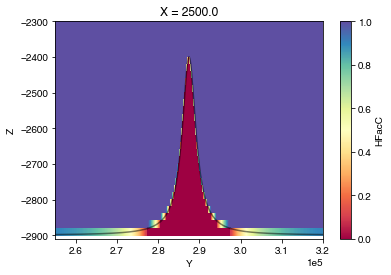

In [11]:
grid.HFacC.plot(cmap='Spectral')
plt.gca().set(xlim=(2.55e5,3.2e5),ylim=(-2910,-2300))
# -grid.Depth.plot(color='k')
plt.plot(grid.Y.values,-grid.Depth.values,color='k',alpha=0.5)

## Plot grid parameters

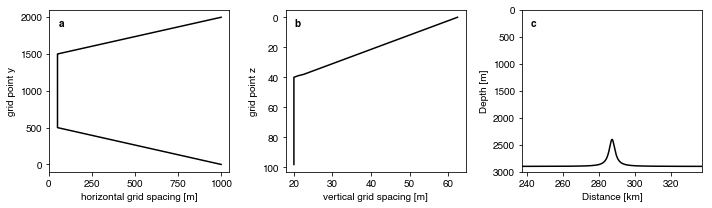

In [12]:
fig, ax = plt.subplots(1,3, figsize=(10,3))
ax = ax.flat
ax[0].plot(np.diff(b6.Y.values), np.arange(0,2000-1),'k')
ax[0].set(xlabel='horizontal grid spacing [m]', ylabel='grid point y')

ax[1].plot(np.diff(-b6s.Z.values), np.arange(0,100-1),'k')
ax[1].set(xlabel='vertical grid spacing [m]', ylabel='grid point z')
ax[1].invert_yaxis()

ax[2].set(ylim=(3000,0), xlim=(my-50,my+50), ylabel='Depth [m]', xlabel='Distance [km]')
# [ax[1].axhline(y=yy, linewidth=0.1, alpha=0.2) for yy in -grid.Z];
# [ax[1].axvline(x=xx, linewidth=0.1, alpha=0.2) for xx in grid.Y/1000];
ax[2].plot(grid.Y/1000,grid.Depth,'k');

for n, axi in enumerate(ax):
    import string
    axi.text(0.05, 0.9, string.ascii_lowercase[n], transform=axi.transAxes, 
            size=10, weight='bold')

plt.tight_layout()
plt.savefig('fig/grid_parameters.png',dpi=300)

The figure shows (a) horizontal grid spacing with higher resolution in the center of the domain, (b) grid spacing in the vertical with higher resolution towards the bottom and (c) the bump in the center of the domain.

## Plot a snapshot of B6
Show only data from the vicinity of the sill.

In [13]:
deltay = 10
yi = np.where((grid.Y/1000>my-deltay) & (grid.Y/1000<my+deltay))
yp1i = np.where((grid.Yp1/1000>my-deltay) & (grid.Yp1/1000<my+deltay))
w = b6.WVEL.isel(Y=yi[0])
v = b6.VVEL.isel(Yp1=yp1i[0])
eps = b6.KLeps.isel(Y=yi[0])
th = b6.THETA.isel(Y=yi[0])

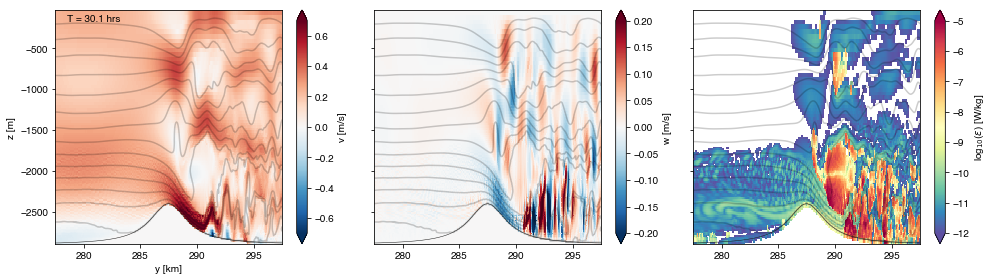

In [14]:
run = 'B6'
ti = 120
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(14,4), sharex=True, sharey=True)

# v
h = ax[0].pcolormesh(v.Yp1.values/1000, grid.Z.values, np.squeeze(v.isel(T=ti).values), cmap='RdBu_r', vmin=-0.7, vmax=0.7)
ax[0].contour(th.Y.values/1000, grid.Z.values, np.squeeze(th.isel(T=ti).values),
            levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
ax[0].plot(grid.Y.isel(Y=yi[0])/1000, -grid.Depth.isel(Y=yi[0]), color='0.1', linewidth=0.5)
plt.colorbar(h, extend='both', ax=ax[0], label='v [m/s]')
timestr = 'T = {:2.1f} hrs'.format((b6['T'][ti].values)/3600)
ax[0].annotate(timestr, xy=(0.05,0.95), xycoords='axes fraction')
ax[0].set(ylabel='z [m]', xlabel='y [km]', xlim=(my-deltay, my+deltay))

# w
h = ax[1].pcolormesh(w.Y.values/1000, grid.Z.values, np.squeeze(w.isel(T=ti).values), cmap='RdBu_r', vmin=-0.2, vmax=0.2)
ax[1].contour(th.Y.values/1000, grid.Z.values, np.squeeze(th.isel(T=ti).values),
            levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
ax[1].plot(grid.Y.isel(Y=yi[0])/1000, -grid.Depth.isel(Y=yi[0]), color='0.1', linewidth=0.5)
plt.colorbar(h, extend='both', ax=ax[1], label='w [m/s]')

# epsilon
tmp = np.squeeze(eps.isel(T=ti).values)
tmp2 = np.ma.masked_less(tmp,1e-12,copy=True)
h = ax[2].pcolormesh(eps.Y.values/1000, grid.Z.values, np.log10(tmp2), cmap='Spectral_r', vmin=-12, vmax=-5)
ax[2].contour(th.Y.values/1000, grid.Z.values, np.squeeze(th.isel(T=ti).values),
            levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
ax[2].plot(grid.Y.isel(Y=yi[0])/1000, -grid.Depth.isel(Y=yi[0]), color='0.1', linewidth=0.5)
plt.colorbar(h, extend='both', ax=ax[2], label='log$_{10}$($\epsilon$) [W/kg]')

plt.tight_layout()
# PrintName = 'movie_{:s}/frame{:04d}.png'.format(run, ti)
PrintName = 'fig/example_non-hydrostatic.png'
plt.savefig(PrintName, dpi=200)

## Read reference profiles

Using a linear equation of state with constant salinity but varying temperature background profile. Read the reference temperature profile tref

Density is defined as in Kang (2010):
$$
\rho(x,y,z,t) = \rho_0 + \rho_b(z) + \rho\prime(x,y,z,t)
$$
with the constant reference density $\rho_0$ or ``rho0``, a background density $\rho_b$ or ``tref`` and a perturbation density $\rho\prime$ associated with motion.

In [15]:
fileName = '/Users/gunnar/Projects/model/flow-across-bump/B6/input/Tref'
tref = np.fromfile(fileName)
print('size of Tref: {0}'.format(tref.shape))

size of Tref: (100,)


Read PHrefC (although this is not useful when using the linear equation of state as explained above since it doesn't include the background density.

In [16]:
# fileName = '/Users/gunnar/Projects/model/bump_data/B6/PHrefC.data'
fileName = '/Volumes/svalbard/mitgcm/bump/B6/run/PHrefC.data'
PHrefC = np.fromfile(fileName)

## Easier plotting of fields

In [17]:
def CenterPlot(dy=50,ax=0):
    if ax==0:
        ax = plt.gca()
    ax.set(xlim=my.values+(-dy,dy))

In [18]:
def PlotField(F):
    fig,ax = plt.subplots()
    ax.pcolormesh(grid.Y/1e3,grid.Z,np.ma.masked_where(np.squeeze(grid.HFacC)<1,np.squeeze(F)))
    CenterPlot()

In [19]:
# PlotField(b6.WVEL.isel(T=150))
# CenterPlot()

## Density
We are using a linear equation of state where
$$ \rho' = -\rho_0 \alpha_T \theta$$

Below are a few snippets from the mitgcm email list...

[link](http://mitgcm.org/pipermail/mitgcm-support/2006-December/004492.html)<br>
$\rho = \rho_0 (1-t_{\alpha}\cdot(\theta-\theta_{ref}))$

[link](http://forge.csail.mit.edu/pipermail/mitgcm-support/2004-June/002269.html)<br>
Not quite sure, what you mean, but<br>
``rho=rhoNil*(1-tAlpha*(theta(z)-tRef(z)) + sBeta*(salt(z)-sRef(z)))``<br>
``rho=rhoNil - tAlpha*theta*rhoNil + tAlpha*tRef*rhoNil``<br>
is the linear eos. rhoNil is a constant. So if sBeta=0 then<br>
``rhoNil*(1+tAlpha*tRef(z))``<br>
is your reference density.

[link](http://mitgcm.org/pipermail/mitgcm-support/2011-April/007124.html)<br>
[...] what many of us do in idealized setups where we don't care about T & S individually but only about buoyancy in general. Specifically, I use the following options in my data file.<br>
``eosType='LINEAR'``<br>
``tAlpha=2.0E-04``<br>
``sBeta=0.``<br>
``saltStepping = .false.``<br>

Then the buoyancy is defined as<br>
``gravity * tAlpha * THETA``

In [20]:
rho0 = 9.998000000000000e02 # from STDOUT, e.g.: grep -A 1 'rho' STDOUT.0000
gravity = 9.81
talpha = 2.0e-4
# convert reference temperature profile to matrix
trefm = np.tile(tref,(2000,1))
trefm = np.transpose(trefm)
# calculate densities
temp = np.squeeze(b6s.Temp.values)
rho = rho0*(1-talpha*(temp))
rhopert = -rho0*talpha*(temp-trefm)
rhoref = -rho0*talpha*trefm

Let's make sure that this all makes sense. Look at temperature first and then see if the density perturbation is right.

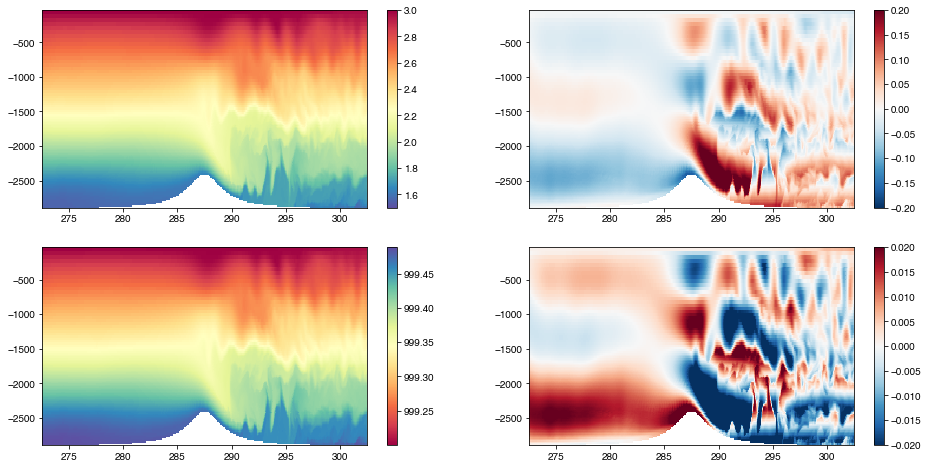

In [21]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))
ax = ax.flatten()
tempm = np.ma.masked_where(np.squeeze(grid.HFacC)<1, temp[-1,:,:])
h0 = ax[0].pcolormesh(grid.Y/1e3,grid.Z,tempm,cmap='Spectral_r',vmin=1.5, vmax=3)
plt.colorbar(h0,ax=ax[0])
CenterPlot(15,ax=ax[0])

h1 = ax[1].pcolormesh(grid.Y/1e3,grid.Z,tempm-trefm,cmap='RdBu_r',vmin=-0.2,vmax=0.2)
plt.colorbar(h1,ax=ax[1])
CenterPlot(15,ax = ax[1])

rhom = np.ma.masked_where(np.squeeze(grid.HFacC)<1, rho[-1,:,:])
h2 = ax[2].pcolormesh(grid.Y/1e3,grid.Z,rhom,cmap='Spectral')
plt.colorbar(h2,ax=ax[2]);
CenterPlot(15,ax=ax[2])

rhopm = np.ma.masked_where(np.squeeze(grid.HFacC)<1, rhopert[-1,:,:])
h3 = ax[3].pcolormesh(grid.Y/1e3,grid.Z,rhopm,cmap='RdBu_r',vmin=-0.02,vmax=0.02)
plt.colorbar(h3,ax=ax[3]);
CenterPlot(15,ax[3])

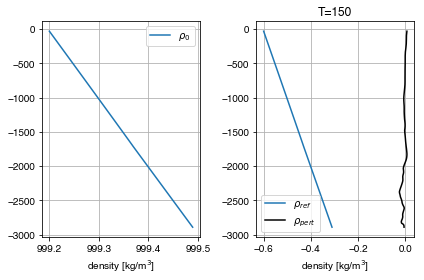

In [22]:
fig, ax = plt.subplots(ncols=2)
ax[1].plot(rhoref[:,1250],grid.Z,label=r'$\rho_{ref}$')
ax[0].plot(np.squeeze(rho[0,:,1250]),grid.Z,label=r'$\rho_0$')
ax[1].plot(np.squeeze(rhopert[150,:,1250]),grid.Z,label=r'$\rho_{pert}$',color='k')
ax[1].set_title('T=150')
for axi in ax:
    axi.legend()
    axi.grid()
    axi.set(xlabel='density [kg/m$^3$]')
plt.tight_layout()

Let's make sure whe have N$^2=10^{-6}$<br>
$N^2 = \frac{g}{\rho} \frac{\partial \rho}{\partial z}$<br>
Rough estimate with a change in density of 0.3 kg/m$^3$ over 3000 m.

In [23]:
gravity/rho0*0.3/3000

9.811962392478495e-07

## Pressure

b6.PHIHYD:<br>Hydrostatic Pressure Pot.($p/\rho$) Anomaly<br>units: m$^2$ s$^{-2}$

In [24]:
phi_hyd = b6.PHIHYD

ok, let's have a look at the 'uncalibrated' hydrostatic pressure output. We can see the pressure drop across the ridge!

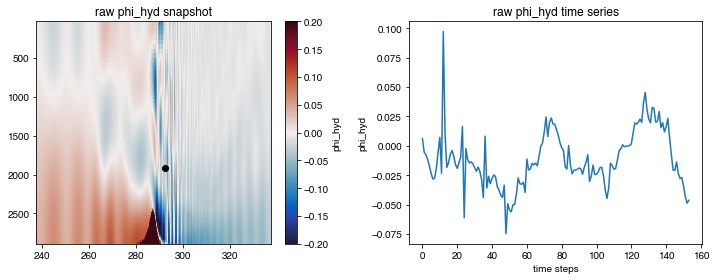

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
h = ax[0].pcolormesh(grid.Y.values/1000,-grid.Z.values,np.squeeze(phi_hyd.isel(T=100)), vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance)
plt.colorbar(h, ax=ax[0],label='phi_hyd')
ax[0].invert_yaxis()
ax[0].set_title('raw phi_hyd snapshot')
ax[0].set(xlim=(my-50,my+50))
ax[1].plot(np.squeeze(phi_hyd.isel(Zmd000100=50, Y=1100)))
ax[0].plot(grid.Y.values[1100]/1000,-grid.Z.values[50],'ko')
ax[1].set(title='raw phi_hyd time series',xlabel='time steps',ylabel='phi_hyd')
plt.tight_layout()

Look at non-hydrostatic pressure. We need to interpolate hydrostatic and non-hydrostatic pressure to the same time vector.

In [26]:
phi_nh = b6s.phi_nh
# we need to interpolate phi_nh to the time vector of phi_hyd
print(phi_nh.shape)
tmp = np.squeeze(phi_nh)
phi_nh2 = (tmp[1:,:,:].values + tmp[:-1,:,:].values) / 2
print(phi_nh2.shape)

(155, 100, 2000, 1)
(154, 100, 2000)


In [27]:
phi_hyd2 = np.squeeze(phi_hyd.values)
print(phi_hyd2.shape)

(154, 100, 2000)


Plot the 'uncalibrated' non-hydrostatic pressure potential anomaly.

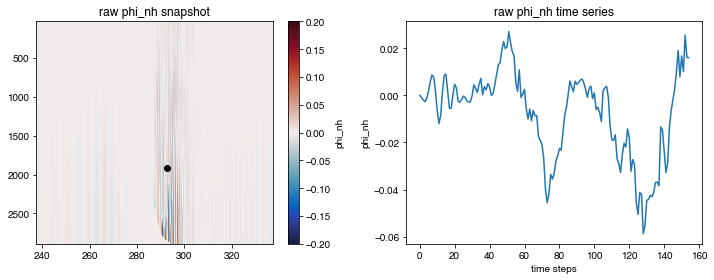

In [28]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
h = ax[0].pcolormesh(grid.Y.values/1000,-grid.Z.values,np.squeeze(phi_nh.isel(T=100)), vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance)
plt.colorbar(h, ax=ax[0],label='phi_nh')
ax[0].invert_yaxis()
ax[0].set_title('raw phi_nh snapshot')
ax[0].set(xlim=(my-50,my+50))
ax[1].plot(np.squeeze(phi_nh[:,50,1100]))
ax[0].plot(grid.Y.values[1100]/1000,-grid.Z.values[50],'ko')
ax[1].set(title='raw phi_nh time series',xlabel='time steps',ylabel='phi_nh')
plt.tight_layout()

now convert phi_hyd and phy_nh to a meaningful pressure

[the pressure P can be obtained as:](http://mitgcm.org/pipermail/mitgcm-support/2013-August/008448.html)

  `` P(i,j,k)/rhoConst = -g*rC(k) + PH(i,j,k) + PNH(i,j,k)``
  
where RC is the coordinate of the cell center with units in m.
  
phi_nh is on Z whereas phi_hyd is on Zmd0001000 - I'm assuming these are the same. They have the same number of depth levels. However, we need to interpolate to the same time steps since the hydrostatic pressure was output in the diagnostic file and the non-hydrostatic in the state file.

To obtain the pressure anomaly, multiply with $\rho_0$:
<br>
$p = phi_{hyd} \cdot \rho_0$.

Let's make sure the units are right:<br>
m$^2\,$s$^{-2} \cdot $kg$\,$m$^{-3} = $kg$\,$m$^{-1}\,$s$^{-2}$ = N$\,$m$^{-2}$ with N=kg$\,$m$\,$s$^{-2}$.

Actually, in a non-hydrostatic run we need to include the non-hydrostatic pressure as well:<br>
$p = (phi_{H}+phi_{NH}) \cdot \rho_0$.

[link](http://mitgcm.org/pipermail/mitgcm-support/2013-November/008636.html)<br>
for the linear equation of state:

``P_k = (PhiHyd*rhoconst + sum(rho0*dc*g))``

where rho0 is rhoconst+rhoRef(k), and rhoRef(k) is set by Tref and Sref.  This doesn't seem consistent with the other equations fo state, but a lot of internal wave folks use linear equation of state, so its something to bear in mind.  However, this term has no physical dynamics either, so, can be dropped.

See the thread "difference between PH and PHL" from Aug 2013.

Cheers,  Jody

[link](http://mitgcm.org/pipermail/mitgcm-support/2013-August/008449.html)<br>
From those output files, the pressure P can be obtained as:<br>
``P(i,j,k)/rhoConst = -g*rC(k) + PH(i,j,k) + PNH(i,j,k)``

Except this isn't quite correct:<br>
``P(i,j,k)/rhoConst = -g*rC(k) + PH(i,j,k) + PNH(i,j,k) + PHref(k)``<br>
where PHref(k) is the hydrostatic pressure due to Tref and Sref.
see calc_phi_hyd.F and find_rho.F.

[link to Jody's gist on pressure in mitgcm](https://gist.github.com/jklymak/156c30b5344a9cf63e8aebc429fee1c6)

In [29]:
rho0 = 9.998000000000000e02 # from STDOUT, e.g.: grep -A 1 'rho' STDOUT.0000
gravity = 9.81
talpha = 2.0e-4

In [30]:
RC = np.tile(grid.RC,(2000,1))
# R coordinate of cell center units: m

Calculate pressure

In [34]:
P = phi_hyd2*rho0 + phi_nh2*rho0 - gravity*np.abs(RC.T)*(rho0)
P = P[:,:-1,:]
P.shape

(154, 99, 2000)

Plot pressure (won't see much of the pressure perturbations). Dividing by 10$^5$ should convert from N/m$^2$ to dbar. Not quite sure what is wrong here - probably missing the contribution of Tref.

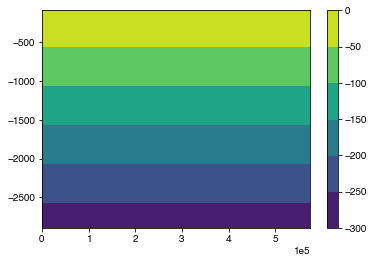

In [35]:
plt.contourf(grid.Y,grid.Z[1:],np.squeeze(P[-1,:,:]/1e5),5)
plt.colorbar()

ok, let's look only at the pressure anomalies:

In [36]:
PP = phi_hyd2*rho0 + phi_nh2*rho0

The pressure anomalies show barotropic waves propagating back and forth through the domain (see little movie). They should be visible in $\eta$!

In [37]:
import io
import base64
from IPython.display import HTML

video = io.open('pressure_movie/pressure.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

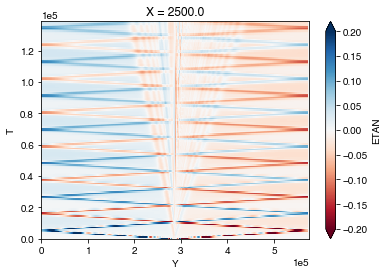

In [38]:
eta = b62.ETAN
eta.plot(vmin=-0.2,vmax=0.2,cmap='RdBu');

The speed of these waves is approximately 1e6 m in 2e4 s (one run through the domain). This corresponds to 50 m/s:

In [39]:
1e6/2e4

50.0

Let's remove barotropic pressure perturbations and only look at the baroclinic pressure:

We need to remove bogus values below the seafloor.

In [40]:
grid.HFacC.shape

(100, 2000, 1)

HFacC shows the vertical extent of each cell (between 0 and 1). Let's generate a matrix that has ones where HFacC is one and zeros elsewhere - when looking for pressure, we don't want to multiply by half cells anywhere.

In [41]:
BathyMask = np.squeeze(np.copy(grid.HFacC.values))
BathyMaskF = np.squeeze(np.copy(grid.HFacS.values))

In [42]:
BathyMask[BathyMask<1] = 0
BathyMaskF[BathyMaskF<1] = 0

In [43]:
BathyMaskNaN = BathyMask.copy()
BathyMaskNaN[BathyMask<1] = np.nan
BathyMaskFNaN = BathyMaskF.copy()
BathyMaskFNaN[BathyMaskF<1] = np.nan

Calculate baroclinic pressure using ``BathyMask``.

In [44]:
PPbt = np.tile(np.transpose(np.mean(PP*BathyMask,axis=1)),(100,1,1))
PPbt = np.rollaxis(PPbt,2,0)
PPbc = (PP-PPbt)*BathyMask

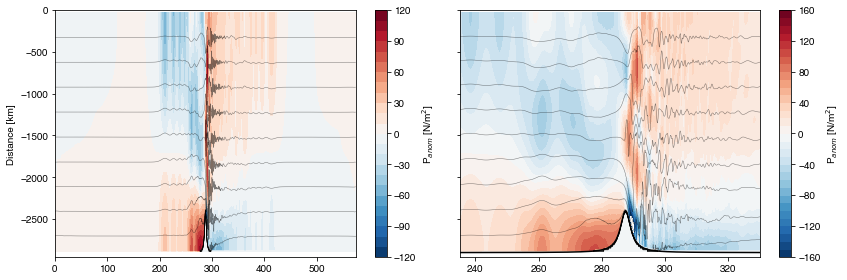

In [45]:
ti = 132
fig, ax = plt.subplots(ncols=2,figsize=(12,4),sharey=True)
h = ax[0].contourf(grid.Y/1e3,grid.Z,PPbc[ti,:,:],np.arange(-120,130,10),cmap='RdBu_r')
ax[0].contour(grid.Y/1e3,grid.Z,np.squeeze(b6.THETA.isel(T=ti)),20,colors='k',alpha=0.5,linewidths=0.5)
plt.colorbar(h,ax=ax[0],label='P$_{anom}$ [N/m$^2$]')
ax[0].set(ylabel='Distance [km]')
h2 = ax[1].contourf(grid.Y/1e3,grid.Z,PPbc[ti,:,:],np.arange(-160,170,10),cmap='RdBu_r')
ax[1].contour(grid.Y/1e3,grid.Z,np.squeeze(b6.THETA.isel(T=ti)),20,colors='k',alpha=0.5,linewidths=0.5)
ax[1].plot(grid.Y/1e3,-grid.Depth,'k')
plt.colorbar(h2,ax=ax[1],label='P$_{anom}$ [N/m$^2$]')
ax[1].set(xlim=(235,330),ylim=(-2950,0))
plt.tight_layout()

Look at bottom pressure development in time - first the barotropic signal dominates, but then the pressure drop across the bump develops further.

In [46]:
phibot = b62.PHIBOT*rho0

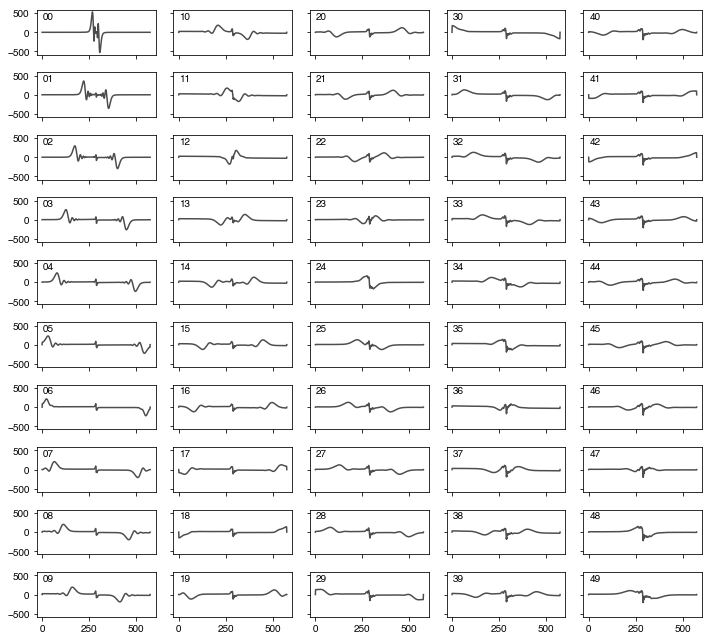

In [47]:
fig, ax = plt.subplots(nrows=10,ncols=5,figsize=(10,9),sharex=True,sharey=True)
ax = np.swapaxes(ax,0,1)
ax = ax.flat
for i, axi in enumerate(ax):
    axi.plot(grid.Y/1e3,np.squeeze(phibot[i,:,:,:]),color='0.3')
    axi.text(0.05, 0.8, '{:02d}'.format(i), transform=axi.transAxes, 
            size=10)
plt.tight_layout()

## Barotropic/Baroclinic Velocities
The horizontal barotropic velocity $V$ is defined as
$$V = \frac{1}{H} \int_{-d}{\eta}\, v\, dz = \frac{1}{H} \overline{u}$$

In [48]:
# barotropic velocities. We'll have to include the bottom cell as a fraction
# and should also include the eta part at the surface (although omitting this
# for now, the error should really be minor as H>>eta)

# bring drF to matrix form
drF = np.tile(grid.drF.values.T,(2001,1))
drF = drF.T
# calculate depth at the grid faces from drF and HFacS
DepthS = np.sum(drF*np.squeeze(grid.HFacS.values),axis=0)
V = np.sum(np.squeeze(b6.VVEL.values)*drF*np.squeeze(grid.HFacS.values),axis=1) / DepthS

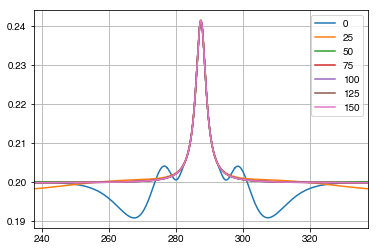

In [49]:
# Plot V for a few time steps - the barotropic wave should diminish over time
for i in np.linspace(0,150,7,dtype='int'):
    plt.plot(grid.Yp1/1e3,V[i,:],label='{0}'.format(i))
CenterPlot()
plt.grid()
plt.legend();

Baroclinic velocity

In [50]:
# we need to bring V to the same shape as the velocity matrix
V2 = np.tile(V,(100,1,1))
V3 = np.rollaxis(V2,0,2)

In [51]:
v = np.squeeze(b6.VVEL.values)-V3
v = v*BathyMaskFNaN

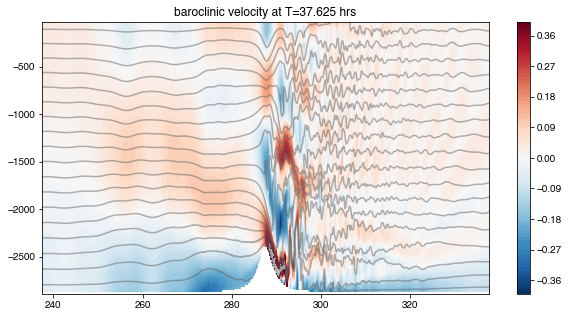

In [52]:
fig,ax = plt.subplots(figsize=(10,5))
h = plt.contourf(grid.Yp1/1e3,grid.Z,np.squeeze(v[150,:,:]),np.arange(-0.4,0.41,0.01),cmap='RdBu_r')
plt.contour(grid.Y/1e3,grid.Z,np.squeeze(b6.THETA[150,:,:])*BathyMaskNaN,20,colors='0.4',alpha=0.5)
ax.set(title='baroclinic velocity at T={0} hrs'.format(b6['T'].values[150]/3600))
plt.colorbar(h)
CenterPlot()

## Buoyancy Flux and BT-BC Conversion

The buoyancy flux is defined as
$$F_B = \rho' g w$$
and the depth-integrated buoyancy flux within a fixed water column as
$$\overline{F_B} = \int_{-d}^{\eta} \rho' g w\, dz $$
with density perturbation $\rho'$, gravity $g$ and vertical velocity $w$.

Vertical velocities are defined on the cell edges, not on the cell center like $g'$, therefore it is interpolated to the cell centers in the following. Vertical velocities are defined on the upper cell faces, there are none on the bottom of the lowest cells.

The barotropic to baroclinic conversion term is defined as
$$F_{Conv} = \overline{\rho' g W}$$
with the barotropic vertical velocity $W$.

In [53]:
# bring drF to matrix form
drFC = np.tile(grid.drF.values.T,(2000,1))
drFC = drFC.T
# bring dyF to matrix form
dyFC = np.tile(grid.dyF.values.T,(100,1))

In [54]:
WF = np.squeeze(b6s.W)
print('WF dims: {0}'.format(WF.shape))

WF dims: (155, 100, 2000)


In [55]:
# interpolate to cell centers. there are no velocities defined at the bottom of the lowest cells. We'll simply repeat
# the velocities from the cells above to end up with the right dimensions here.
# np.dbstack() only works along the 3rd (last?) dimension, so we have to roll axes...
WFr = np.rollaxis(WF.values,1,3)
WF2 = np.dstack((WFr,WF[:,-1,:]))
WF2 = np.rollaxis(WF2,2,1)
print(WF2.shape)
WC = (WF2[:,1:,:]+WF2[:,:-1,:]) / 2
print(WC.shape)

(155, 101, 2000)
(155, 100, 2000)


Calculate barotropic vertical velocity $W$ and baroclinic vertical velocity $w'$

In [56]:
# calculate depth at the grid faces from drFC and HFacC
DepthC = np.sum(drFC*np.squeeze(grid.HFacC.values),axis=0)
# calculate barotropic vertical velocity
W = np.sum(np.squeeze(WC)*drFC*np.squeeze(grid.HFacC.values),axis=1) / DepthC

Temporal evoution of $W$ (with location of bump indicated at the bottom):

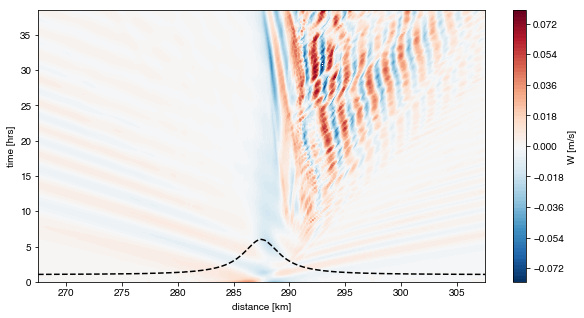

In [57]:
fig,ax = plt.subplots(figsize=(10,5))
h = ax.contourf(grid.Y/1e3,b6s['T']/3600,W,np.arange(-0.08,0.082,0.002),cmap='RdBu_r',title='Barotropic W')
plt.colorbar(h,label='W [m/s]');
ax.plot(grid.Y/1e3,-(grid.Depth/100-30),'k--')
ax.set(xlabel='distance [km]',ylabel='time [hrs]')
CenterPlot(20)

In [58]:
# we need to bring W to the same shape as the velocity matrix WC
W2 = np.tile(W,(100,1,1))
W3 = np.rollaxis(W2,0,2)

In [59]:
# calculate baroclinic vertical velocity
w = np.squeeze(WC)-W3
w = w*BathyMaskNaN

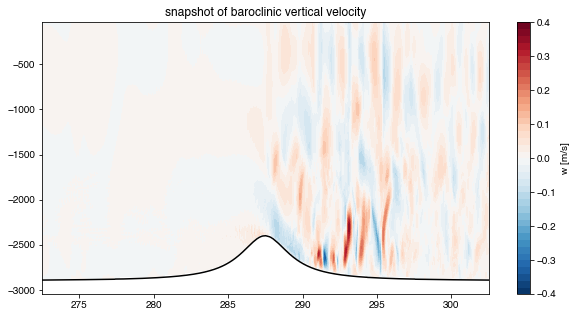

In [60]:
fig,ax = plt.subplots(figsize=(10,5))
h = ax.contourf(grid.Y/1e3,grid.Z,w[-1,:,:],np.arange(-0.4,0.42,0.02),cmap='RdBu_r')
ax.set_title('snapshot of baroclinic vertical velocity')
plt.colorbar(h,label='w'' [m/s]')
plt.plot(grid.Y/1e3,-grid.Depth,'k')
CenterPlot(15)

In [61]:
BuoyancyFlux = gravity*rhopert*WC

In [62]:
BarotropicBaroclinicConversion = gravity*rhopert*W3*BathyMaskNaN

Let's plot an example of buoyancy flux density:

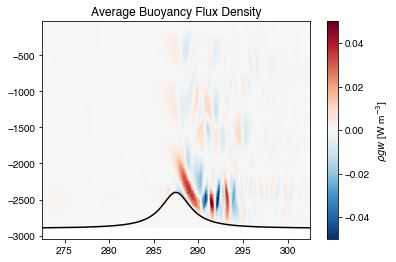

In [63]:
plt.pcolormesh(grid.Y/1e3,grid.Z,np.squeeze(np.mean(BuoyancyFlux[120:-1,:,:],axis=0)),vmin=-0.05,vmax=0.05,cmap='RdBu_r')
CenterPlot(15)
plt.title('Average Buoyancy Flux Density')
plt.colorbar(label=r'$\rho'' g w$ [W m$^{-3}$]')
plt.plot(grid.Y/1e3,-grid.Depth,'k');

and BT-BC conversion

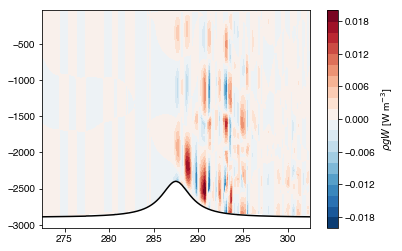

In [64]:
plt.contourf(grid.Y/1e3,grid.Z,BarotropicBaroclinicConversion[-1,:,:],np.arange(-0.02,0.022,0.002),cmap='RdBu_r')
CenterPlot(15)
plt.colorbar(label=r'$\rho'' g W$ [W m$^{-3}$]')
plt.plot(grid.Y/1e3,-grid.Depth,'k');

Depth integrals of buoyancy flux and BT-BC conversion

In [65]:
# calculate depth at the grid faces from drF and HFacS
# DepthC = np.sum(drFC*np.squeeze(grid.HFacC.values),axis=0)
BuoyancyFluxDepthIntegrated = np.sum(np.squeeze(BuoyancyFlux)*drFC*np.squeeze(grid.HFacC.values),axis=1)
BuoyancyFluxVolumeIntegrated = np.sum(np.sum(BuoyancyFlux*drFC*dyFC*np.squeeze(grid.HFacC.values),axis=1),axis=1)
BarotropicBaroclinicConversionDepthIntegrated = np.nansum(BarotropicBaroclinicConversion*drFC*np.squeeze(grid.HFacC.values),axis=1)
BarotropicBaroclinicConversionVolumeIntegrated = np.nansum(np.nansum(BarotropicBaroclinicConversion*drFC*dyFC*np.squeeze(grid.HFacC.values),axis=1),axis=1)

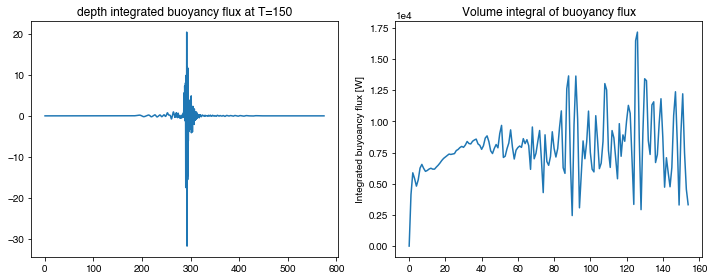

In [66]:
fig,ax = plt.subplots(ncols=2,figsize=(10,4))
ax[0].plot(grid.Y/1e3,BuoyancyFluxDepthIntegrated[150,:])
ax[0].set_title('depth integrated buoyancy flux at T=150')
ax[1].plot(BuoyancyFluxVolumeIntegrated)
ax[1].set(ylabel='Integrated buyoancy flux [W]')
ax[1].set_title('Volume integral of buoyancy flux');
plt.tight_layout()

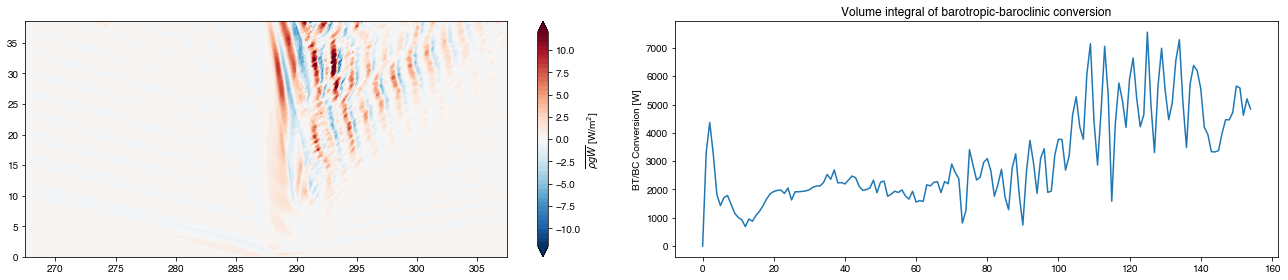

In [67]:
fig,ax = plt.subplots(ncols=2,figsize=(18,4))
h = ax[0].contourf(grid.Y/1e3,b6s['T']/3600,BarotropicBaroclinicConversionDepthIntegrated,np.arange(-12,12.5,0.5),cmap='RdBu_r',extend='both')
CenterPlot(dy=20,ax=ax[0])
plt.colorbar(h,ax=ax[0],label=r'$\overline{\rho'' g W}$ [W/m$^2$]')
ax[1].plot(BarotropicBaroclinicConversionVolumeIntegrated)
ax[1].set(ylabel='BT/BC Conversion [W]')
ax[1].set_title('Volume integral of barotropic-baroclinic conversion');
plt.tight_layout()

The BT-BC conversion also has the non-hydrostatic part
$$\overline{q_z W}$$

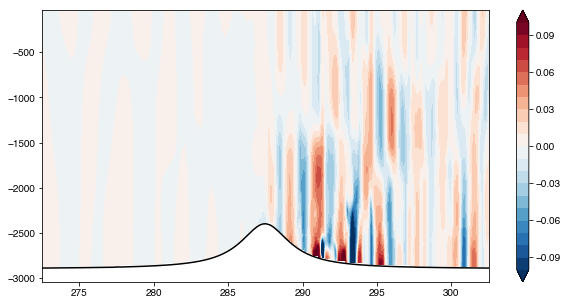

In [68]:
# plot non-hydrostatic pressure potential anomaly
fig,ax = plt.subplots(figsize=(10,5))
h = ax.contourf(grid.Y/1e3,grid.Z,np.squeeze(b6s.phi_nh[-1,:,:])*BathyMaskNaN,np.arange(-0.1,0.11,0.01),cmap='RdBu_r',extend='both')
plt.colorbar(h)
CenterPlot(15,ax)
plt.plot(grid.Y/1e3,-grid.Depth,'k')

In [254]:
# non-hydrostatic pressure potential anomaly
q = np.squeeze(b6s.phi_nh.values)
# multiply with density for non-hydrostatic pressure anomaly
q = q*rho0
drC = np.tile(grid.drC.values.T,(2000,1))
drC = drC.T
qz = np.gradient(q,axis=1)/((drC[1:,:] + drC[:-1,:])/2)
qz = (qz[1:,:,:] + qz[:-1,:,:])/2

In [258]:
nonhydConversion = qz*WC*BathyMaskNaN

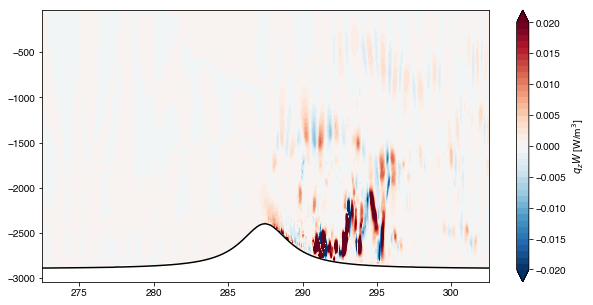

In [261]:
fig,ax = plt.subplots(figsize=(10,5))
h = ax.contourf(grid.Y/1e3,grid.Z,nonhydConversion[-1,:,:],np.arange(-2e-2,2.1e-2,1e-3),cmap='RdBu_r',extend='both')
plt.colorbar(h,label='$q_z W$ [W/m$^3$]')
CenterPlot(15,ax)
ax.plot(grid.Y/1e3,-grid.Depth,'k');

Depth-integrated non-hydrostatic conversion

In [262]:
nonhydConversionDepthIntegrated = np.nansum(nonhydConversion*drFC*np.squeeze(grid.HFacC.values),axis=1)
nonhydConversionVolumeIntegrated = np.nansum(np.nansum(nonhydConversion*drFC*dyFC*np.squeeze(grid.HFacC.values),axis=1),axis=1)

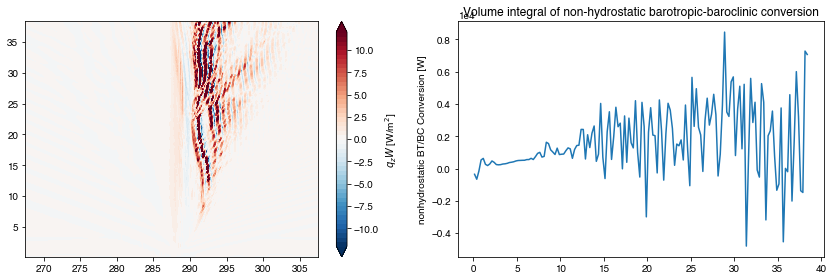

In [272]:
fig,ax = plt.subplots(ncols=2,figsize=(12,4))
h = ax[0].contourf(grid.Y/1e3,b62['T']/3600,nonhydConversionDepthIntegrated,np.arange(-12,12.5,0.5),cmap='RdBu_r',extend='both')
CenterPlot(dy=20,ax=ax[0])
plt.colorbar(h,ax=ax[0],label=r'$q_z W$ [W/m$^2$]')
ax[1].plot(b62['T']/3600,nonhydConversionVolumeIntegrated)
ax[1].set(ylabel='nonhydrostatic BT/BC Conversion [W]')
ax[1].set_title('Volume integral of non-hydrostatic barotropic-baroclinic conversion');
plt.tight_layout()

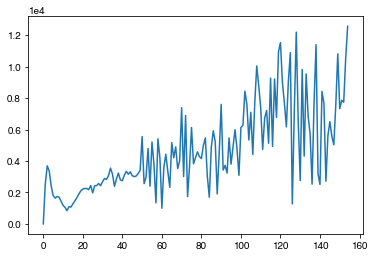

In [77]:
plt.plot(nonhydConversionVolumeIntegrated+BarotropicBaroclinicConversionVolumeIntegrated)

## Energy

### Kinetic Energy
Velocities are calculated on the cell faces. Interpolate to cell centers.

We'll also need to remove any values below the bottom.

In [78]:
VF = b6.VVEL.values
VC = (VF[:,:,1:]+VF[:,:,:-1]) / 2
vc= (v[:,:,1:]+v[:,:,:-1]) / 2

In [79]:
WC = b6.WVEL.values

In [80]:
# kinetic Energy
# this is energy per volume element, so N m / m^3:   kg/m^3 * m^2/s^2 = kg/m s^2 = N/m^2 = J/m^3
Ekin = rho0*(VC**2)
Ekin = np.squeeze(Ekin)*BathyMaskNaN
Ekin.shape

(154, 100, 2000)

Baroclinic kinetic energy

In [81]:
Ekinbc = rho0*(vc**2)

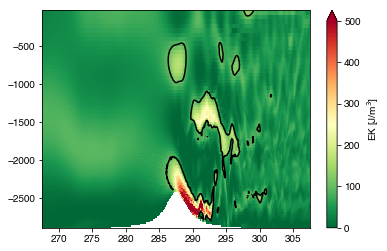

In [92]:
Ekinma = np.ma.masked_where(np.squeeze(grid.HFacC)<1, np.squeeze(Ekin[-1,:,:]))

h = plt.pcolormesh(grid.Y/1e3,grid.Z,Ekinma,cmap='RdYlGn_r',vmin=0,vmax=500)
plt.contour(grid.Y/1e3,grid.Z,Ekinma,levels=[100],colors='k')
# plt.contour(grid.Y/1e3,grid.Z,Ekinma,levels=[2, 300],colors='k')
CenterPlot(20)
plt.colorbar(h,extend='max',label='EK [J/m$^3$]');

Depth-integrated kinetic energy

In [83]:
drFm = np.tile(grid.drF.values,(2000,1))
drFm = drFm.T
drFm.shape

(100, 2000)

In [84]:
Ekind = np.nansum(Ekin*drFm,axis=1)
Ekinbcd = np.nansum(Ekinbc*drFm,axis=1)

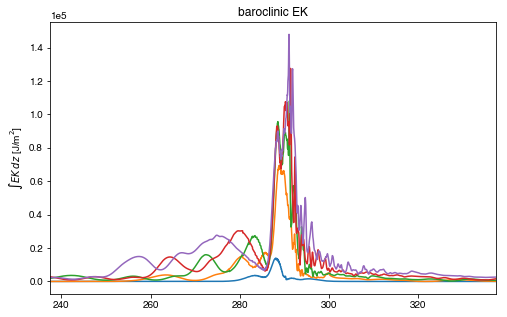

In [85]:
fig,ax = plt.subplots(figsize=(8,5))
for i in np.linspace(10,150,5,dtype='int'):
    ax.plot(grid.Y/1e3,Ekinbcd[i,:])
ax.set(ylabel=r'$\int EK \, dz$ [J/m$^2$]',title='baroclinic EK')
CenterPlot()

### Potential Energy
Perturbation Potential Energy [J/m$^2$]
$$ \overline{E_{p0}} = \int_0^\eta \rho_0\, g\, z\, dz = 1/2\, \rho_0\, g\, \eta^2$$

In [86]:
Ep0 = np.squeeze(1/2*rho0*gravity*eta.values**2)
Ep0.shape

(154, 2000)

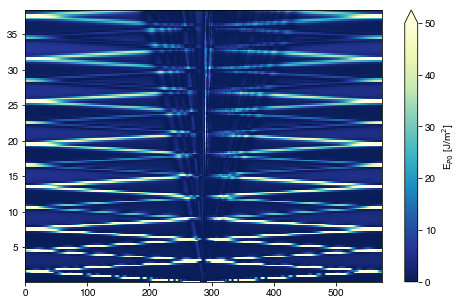

In [87]:
fig,ax = plt.subplots(figsize=(8,5))
h = ax.pcolormesh(grid.Y/1e3,b6['T']/3600,Ep0,vmin=0,vmax=50,cmap='YlGnBu_r')
plt.colorbar(h,extend='max',label='E$_{P0}$ [J/m$^2$]');

Available Potential Energy per unit volume [J/m$^3$]
$$  E_p' = \int_{z-\zeta}^z g [\rho(z)-\rho_r(z')]dz' $$

The APE can be approximated with the Linear Available Potential Energy Density, $APE$ and $APE_{lin}$ are the same when the stratification of the fluid is constant.
$$ APE_{lin} = \frac{g^2 \rho'^2}{2 \rho_0 N^2} $$

In this case, we can use the linearized APE but would have to create a look-up table for the vertical distance of a given density to the reference density profile if stratification was non-linear.

In [88]:
APE = gravity**2*(rhopert*BathyMaskNaN)**2/(2*rho0*1e-6)
# bring APE to same times as kinetic energy
APE = (APE[1:,:,:]+APE[-1,:,:]) / 2

Calculate APE following Lamb as in the lee wave paper

In [89]:
def CalculateAPE(ty, ctd):
    ffsg = np.array(ctd['sg4filt'])
    ffz = np.array(ctd['z'])
    Ea = np.array([])
    for sg4 in ty.gsw_sigma4.values.T:
    # sg4 = ty.gsw_sigma4.values[:,11]
        zz = ty.z.values
        H = np.array([])
        drho = np.array([])
        for r, z in zip(sg4, zz):
            if ~np.isnan(r) and r>InterfaceSG4:
                if r>np.max(sg4):
                    H = np.append(H, 5300-z)
                    i2 = gv.near(ffz, 5300)
                    iz = gv.near(ffz, z) # index of far field depth == towyo depth
                    drho = np.append(drho, r-(np.nanmean(ffsg[iz:i2])))
                elif r>InterfaceSG4:
                    i2 = gv.near(ffsg, r) # index of far field sg==towyo sigma
                    iz = gv.near(ffz, z) # index of far field depth == towyo depth
                    H = np.append(H, ffz[i2]-z)
                    drho = np.append(drho, r-(np.nanmean(ffsg[iz:i2])))

        Eatmp = gsw.grav(np.nanmean(ty.lat)) * np.nanmean(H*drho)
        Ea = np.append(Ea, Eatmp)
    ty['APE'] = (['x'], Ea)
    return ty

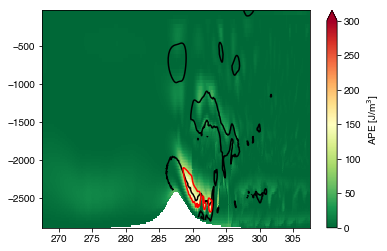

In [100]:
APEma = np.ma.masked_where(np.squeeze(grid.HFacC)<1, np.squeeze(APE[-1,:,:]))

h = plt.pcolormesh(grid.Y/1e3,grid.Z,APEma,cmap='RdYlGn_r',vmin=0,vmax=300)
plt.contour(grid.Y/1e3,grid.Z,Ekinma,levels=[100],colors='k')
plt.contour(grid.Y/1e3,grid.Z,APEma,levels=[100],colors='r',linestyle='-')
# plt.contour(grid.Y/1e3,grid.Z,APEma,levels=[2000],colors='w')
CenterPlot(20)
plt.colorbar(h,extend='max',label='APE [J/m$^3$]');

Depth-integrated APE

In [101]:
APEd = np.nansum(APE*drFm,axis=1)

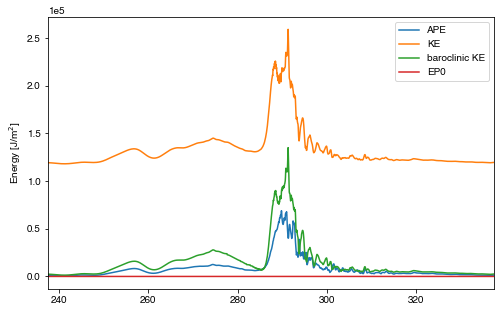

In [102]:
ti = -1
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(grid.Y/1e3,APEd[ti,:],label='APE')
ax.plot(grid.Y/1e3,Ekind[ti,:],label='KE')
ax.plot(grid.Y/1e3,Ekinbcd[ti,:],label='baroclinic KE')
ax.plot(grid.Y/1e3,Ep0[ti,:],label='EP0')
ax.legend()
ax.set(ylabel='Energy [J/m$^2$]')
CenterPlot()

Time-evolution of the sum of APE, KE and EP0.

In [103]:
E = APEd+Ep0+Ekind

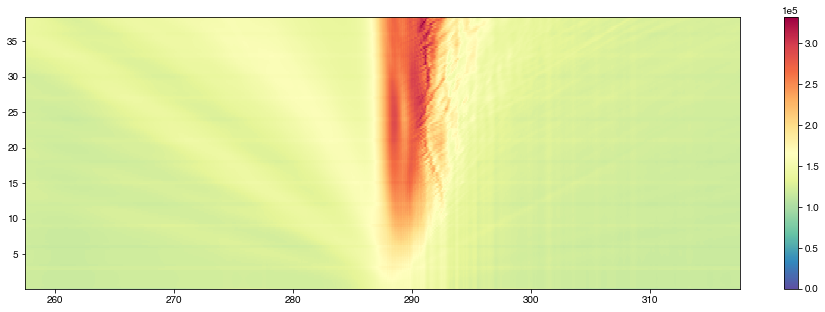

In [104]:
fig,ax = plt.subplots(figsize=(16,5))
h = ax.pcolormesh(grid.Y/1e3,b6['T']/3600,E,cmap='Spectral_r',vmin=0)
plt.colorbar(h)
CenterPlot(30,ax=ax)

## Turbulent Dissipation
Integrate turbulent dissipation with depth

In [105]:
eps = np.squeeze(b6.KLeps.values)*BathyMaskNaN

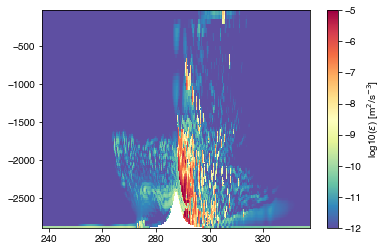

In [106]:
plt.pcolormesh(grid.Y/1e3,grid.Z,np.ma.masked_where(np.squeeze(grid.HFacC)<1,np.log10(eps[150,:,:])),vmin=-12,vmax=-5,cmap='Spectral_r')
plt.colorbar(label=r'log10($\epsilon$) [m$^2$/s$^{-3}$]')
CenterPlot()

In [107]:
eps2 = np.nansum(rho0*np.squeeze(grid.HFacC.values)*eps*np.tile(grid.drF.values,(2000,1)).T,axis=1)

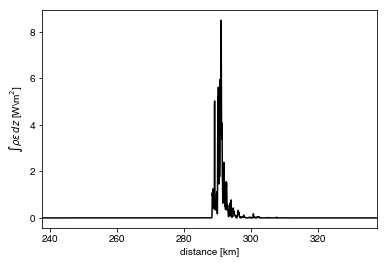

In [108]:
fig,ax = plt.subplots()
ax.plot(grid.Y/1e3,eps2[150,:],'k')
ax.set(ylabel=r'$\int \rho \epsilon \,  dz$ [W\m$^2$]',xlabel='distance [km]')
CenterPlot()

Integrate (cumulative) horizontally

In [109]:
eps3 = np.nancumsum(eps2,axis=1)

Plot for a few time steps

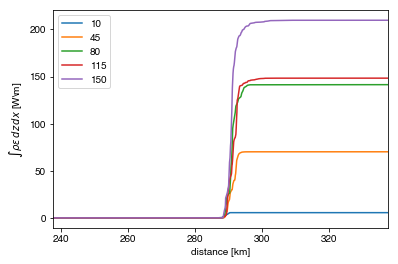

In [110]:
fig,ax = plt.subplots()
for i in np.linspace(10,150,5,dtype='int'):
    ax.plot(grid.Y/1e3,eps3[i,:],label='{0}'.format(i))
ax.set(ylabel=r'$\int \rho \epsilon \,dz\,dx$ [W\m]',xlabel='distance [km]')
ax.legend()
CenterPlot()

## Energy flux
$$F = (KE + APE) v$$ [J/m$^3$ m/s]=[W/m$^2$]

In [111]:
n = 150
F = np.squeeze(Ekin[n,:,:])*np.squeeze(VC[n,:,:])+np.squeeze(APE[n,:,:])*np.squeeze(VC[n,:,:])

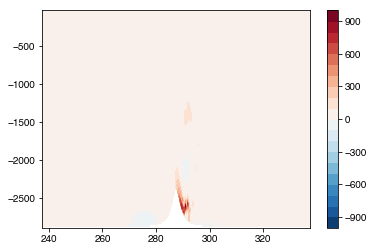

In [112]:
plt.contourf(grid.Y/1e3,grid.Z,F,np.linspace(-1e3,1e3,21),cmap='RdBu_r')
plt.colorbar()
CenterPlot()

Integrate vertically

In [113]:
Fd = np.nansum(F*drFm,axis=0)

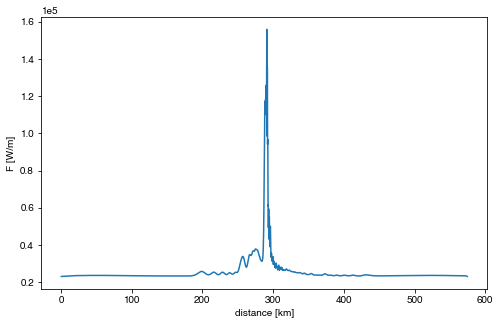

In [114]:
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(grid.Y/1e3,Fd)
ax.set(ylabel='F [W/m]',xlabel='distance [km]');

## Form Drag

The form drag per unit width (as we are working in 2D) is:
$$D_{Form} = - \int P_{bot}\, dh/dy\, dy$$

Depth is defined at cell centers, $dH/dy$ will be defined on the cell faces. We'll interpolate back to cell centers since bottom pressure is defined here.

The bottom pressure anomaly vs. time looks like this:

In [115]:
b62.PHIBOT

<xarray.DataArray 'PHIBOT' (T: 154, Zd000001: 1, Y: 2000, X: 1)>
array([[[[ 0.],
         ..., 
         [ 0.]]],


       ..., 
       [[[ 0.],
         ..., 
         [ 0.]]]])
Coordinates:
  * X        (X) float64 2.5e+03
  * Y        (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * T        (T) float64 450.0 1.35e+03 2.25e+03 3.15e+03 4.05e+03 4.95e+03 ...
Dimensions without coordinates: Zd000001
Attributes:
    description: Bottom Pressure Pot.(p/rho) Anomaly
    units: m^2/s^2

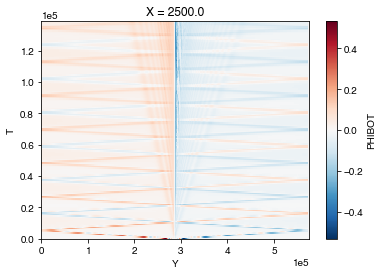

In [116]:
b62.PHIBOT.plot();

In [117]:
# first calculate dh/dy on cell faces since depth is given for cell center
dhdyF = np.squeeze(0.*grid.YG.values[:,0])
test = grid.Depth.diff(dim='Y').values/grid['dyC'].values[1:-1]
dhdyF[1:-1] = np.squeeze(test)
# interpolate to grid centers
from scipy.interpolate import interp1d
f = interp1d(np.squeeze(grid.YG.values[:,0]),dhdyF,bounds_error=False)
dhdy = f(grid.Y.values)

DF = np.squeeze(b62.PHIBOT.values)*rho0*dhdy

# from jody https://github.com/jklymak/LW1kmPython/blob/master/GetEnergyBudget.py
# dhdx = 0.*ds.Depth.values
# dhdx[:,1:] = ds.Depth.diff(dim='XC').values/ds['dxC'].values
# dhdx[:,0]=(grid.Depth[:,-1]-grid.Depth[:,0])/grid['dyC'][0,0]

[(284000.0, 295000.0)]

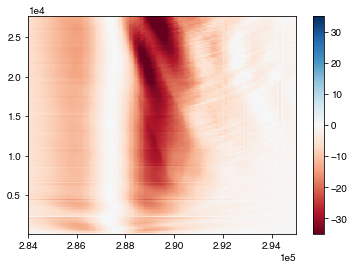

In [118]:
plt.pcolormesh(grid.Y.values,b6.iter,DF,vmin=-35,vmax=35,cmap='RdBu')
plt.colorbar()
plt.gca().set(xlim=(2.84e5,2.95e5))

Now integrate along $y$:

In [119]:
DF = np.sum(-DF*np.squeeze(grid.dyF.values),axis=1)

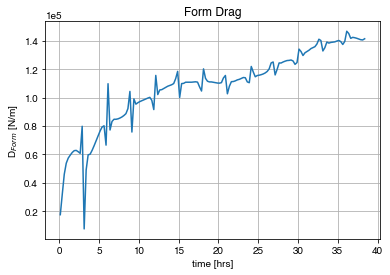

In [120]:
fig, ax = plt.subplots()
ax.plot(b6['T']/3600,DF)
ax.grid()
ax.set(xlabel='time [hrs]',ylabel='D$_{Form}$ [N/m]',title='Form Drag');

The spikes must be due to the barotropic waves crossing the bump.

The energy lost to form drag is $U D_{Form}$ - not quite sure which velocity to use here. Maybe the upstream velocity 0.2 m/s?

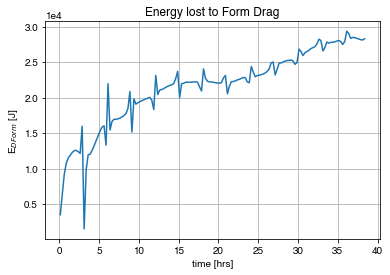

In [121]:
EDF = DF*0.2
fig, ax = plt.subplots()
ax.plot(b6['T']/3600,EDF)
ax.grid()
ax.set(xlabel='time [hrs]',ylabel='E$_{DForm}$ [J]',title='Energy lost to Form Drag');

## Internal wave energy flux w$\prime$p$\prime$

In [122]:
AveragingInterval = slice(120,150)

Calculate mean pressure for time steps 100-150

In [194]:
meanP = np.mean(PP[AveragingInterval,:,:],axis=0)

Calculate p'

In [195]:
pp = PP[AveragingInterval,:,:]-meanP

Calculate v', w'

w is defined on the upper/lower grid boundaries, v at the center.

This is the depth vector for w:

``Zl       (Zl) float64 0.0 -62.96 -124.9 -185.7``

In [208]:
V = np.squeeze(b6.VVEL.values)
# V = V[:,:-1,:]
# W = np.squeeze(b6.WVEL.values)
# interpolate to grid center - for w in the vertical, v in the horizontal
# W = (W[:,1:,:]+W[:,:-1,:]) / 2

# use WC from earlier
WC = np.squeeze(WC)

V = (V[:,:,1:]+V[:,:,:-1]) / 2

In [209]:
WC.shape

(154, 100, 2000)

In [210]:
V.shape

(154, 100, 2000)

In [211]:
meanV = np.mean(V[AveragingInterval,:,:],axis=0)
meanW = np.mean(WC[AveragingInterval,:,:],axis=0)

In [212]:
vp = V[AveragingInterval,:,:]-meanV
wp = WC[AveragingInterval,:,:]-meanW

In [213]:
vppp = vp*pp
wppp = wp*pp

Average in time

In [214]:
mwppp = np.mean(wppp,axis=0)
mvppp = np.mean(vppp,axis=0)

In [215]:
mvppp.shape

(100, 2000)

Average along y

In [217]:
MeanVerticalEnergyFlux = np.mean(mwppp,axis=1)
MeanHorizontalEnergyFlux = np.mean(mvppp,axis=1)

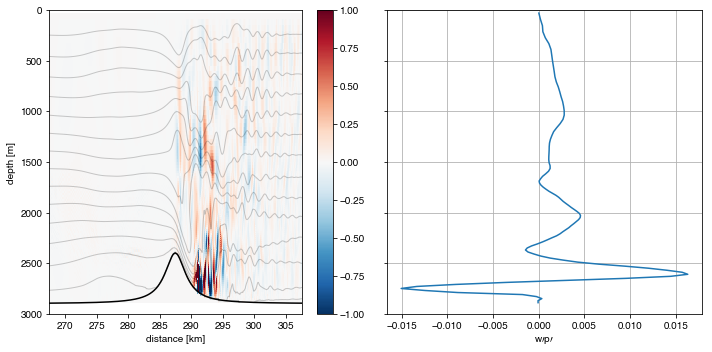

In [219]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharey=True)

# calculate mean density for overlay
th = np.squeeze(b6.THETA.values)
mth = np.mean(th[AveragingInterval,:,:],axis=0)

h = ax[0].pcolormesh(grid.Y/1000,-grid.Z,mwppp,vmin=-1,vmax=1,cmap='RdBu_r')
ax[0].contour(grid.Y/1000,-grid.Z,mth,levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewidths=1)
plt.colorbar(h, ax=ax[0])
ax[0].plot(grid.Y/1000,grid.Depth,'k');
ax[0].set(xlim=(my-20,my+20),ylim=(3000,0),ylabel='depth [m]',xlabel='distance [km]')
# ax[0].invert_yaxis()

ax[1].plot(MeanVerticalEnergyFlux,-grid.Z)
ax[1].grid(True)
ax[1].set(xlabel='w$\prime$p$\prime$')
plt.tight_layout()
if 1:
    plt.savefig('fig/bump_vertical_energy_flux.png',dpi=300)

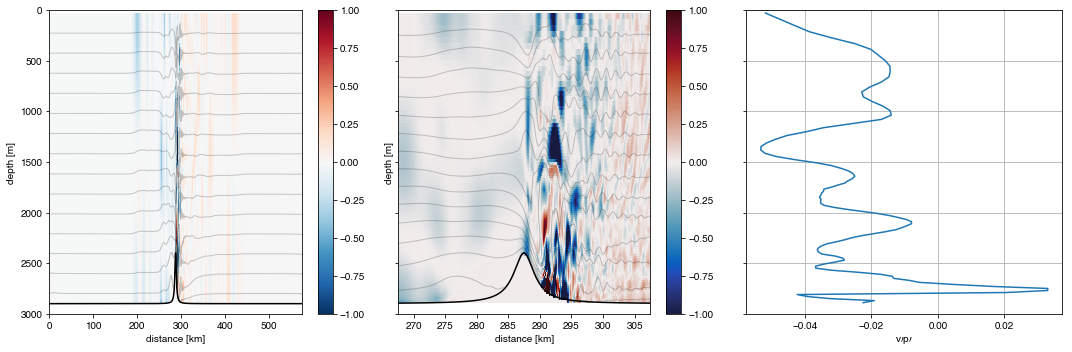

In [220]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5), sharey=True)

# calculate mean density for overlay
th = np.squeeze(b6.THETA.values)
mth = np.mean(th[AveragingInterval,:,:],axis=0)

h = ax[0].pcolormesh(grid.Y/1000,-grid.Z,mvppp,vmin=-1,vmax=1,cmap='RdBu_r')
ax[0].contour(grid.Y/1000,-grid.Z,mth,levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewidths=1)
plt.colorbar(h, ax=ax[0])
ax[0].plot(grid.Y/1000,grid.Depth,'k');
ax[0].set(ylim=(3000,0),ylabel='depth [m]',xlabel='distance [km]')

h = ax[1].pcolormesh(grid.Y/1000,-grid.Z,mvppp,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
ax[1].contour(grid.Y/1000,-grid.Z,mth,levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewidths=1)
plt.colorbar(h, ax=ax[1])
ax[1].plot(grid.Y/1000,grid.Depth,'k');
ax[1].set(xlim=(my-20,my+20),ylim=(3000,0),ylabel='depth [m]',xlabel='distance [km]')

ax[2].plot(MeanHorizontalEnergyFlux,-grid.Z)
ax[2].grid(True)
ax[2].set(xlabel='v$\prime$p$\prime$')
plt.tight_layout()
if 1:
    plt.savefig('fig/bump_horizontal_energy_flux.png',dpi=300)

In [136]:
print(np.mean(MeanVerticalEnergyFlux))
print(np.mean(MeanHorizontalEnergyFlux))

0.00169996998815
-0.025542809628


Looks like the mean vertical energy flux is directed upwards.

## Barotropic-baroclinic conversion vs dissipation and horizontal fluxes

See how far left and right of the ridge we want to integrate. How about starting with 20 km?

In [296]:
dy = 2
yi = np.squeeze(np.where( (grid.Y/1e3>my-dy) & (grid.Y/1e3<my+dy) ))

In [297]:
BTBCtmp = (BarotropicBaroclinicConversion[1:,:,:] + BarotropicBaroclinicConversion[:-1,:,:]) /2
BTBCIntegrated = np.nansum(np.nansum(BTBCtmp[:,:,yi]*drFC[:,yi]*dyFC[:,yi]*np.squeeze(grid.HFacC.values[:,yi,:]),axis=1),axis=1)

In [298]:
nhBTBCIntegrated = np.nansum(np.nansum(nonhydConversion[:,:,yi]*drFC[:,yi]*dyFC[:,yi]*np.squeeze(grid.HFacC.values[:,yi,:]),axis=1),axis=1)

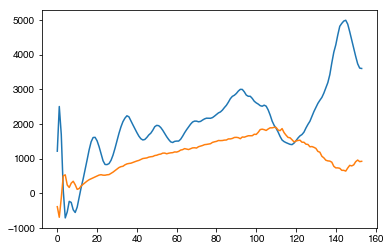

In [299]:
plt.plot(BTBCIntegrated)
plt.plot(nhBTBCIntegrated)

integrate turbulent dissipation

In [300]:
epsint = np.nansum(np.nansum(rho0*np.squeeze(grid.HFacC.values)*eps*drFC*dyFC,axis=1),axis=1)

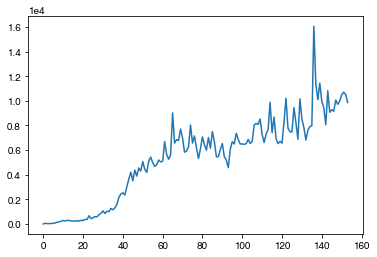

In [301]:
plt.plot(epsint)

depth-integrate horizontal wave energy flux at left and right point

In [319]:
upleft = np.nansum(vppp[:,:,yi[0]]*drFC[:,yi[0]],axis=1)
upright = np.nansum(vppp[:,:,yi[1]]*drFC[:,yi[1]],axis=1)

upDepthIntegrated = np.nansum(vppp[:,:,:]*drFC[:,:],axis=1)

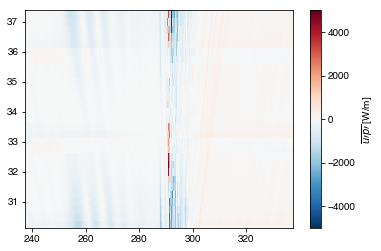

In [320]:
plt.pcolormesh(grid.Y/1e3,b62['T'][AveragingInterval]/3600,upDepthIntegrated,cmap='RdBu_r',vmin=-5000,vmax=5000)
plt.colorbar(label='$\overline{u\prime p\prime}$ [W/m]')
CenterPlot()

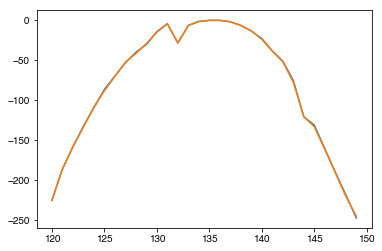

In [303]:
plt.plot(np.arange(120,150),upleft)
plt.plot(np.arange(120,150),upright)

Plot all three therms and the sum

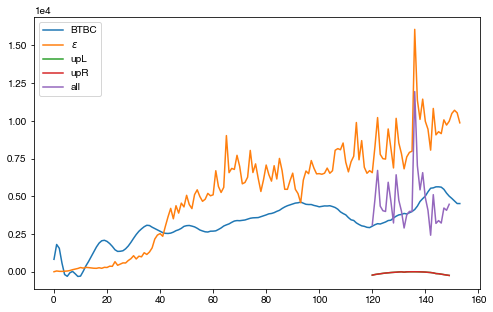

In [304]:
fig,ax = plt.subplots(figsize=(8,5))
plt.plot(BTBCIntegrated+nhBTBCIntegrated,label='BTBC')
plt.plot(epsint,label='$\epsilon$')
plt.plot(np.arange(120,150),upleft,label='u''p''L')
plt.plot(np.arange(120,150),upright,label='u''p''R')
allTerms = -(BTBCIntegrated[AveragingInterval]+nhBTBCIntegrated[AveragingInterval])+epsint[AveragingInterval]+upleft+upright
plt.plot(np.arange(120,150),allTerms,label='all')
plt.legend()